In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm

In [2]:
plt.rcParams['figure.figsize'] = [8, 8]

In [3]:
data = loadmat('ex6data1.mat')

In [4]:
X = data['X']
y = data['y']

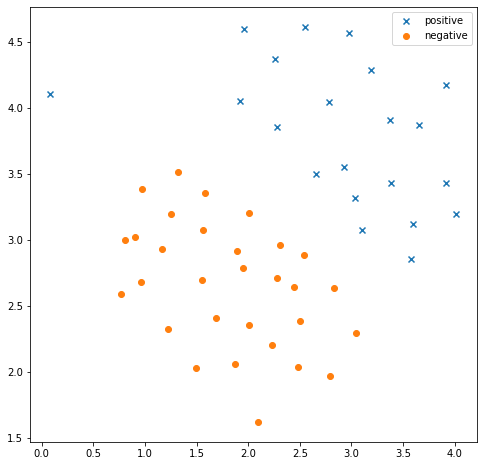

In [5]:
X = data['X']
y = data['y']
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.legend()

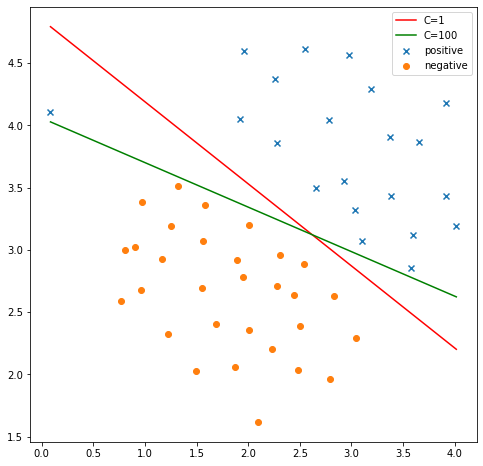

In [6]:
## C = 1
clf = svm.SVC(C=1, kernel='linear')
clf.fit(X, y.ravel())
theta = clf.coef_[0]
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
X2 = (-theta[0] * X1 - clf.intercept_[0]) / theta[1]
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.plot(X1, X2, c='r', label='C=1')
## C = 100
clf2 = svm.SVC(C=100, kernel='linear')
clf2.fit(X, y.ravel())
theta = clf2.coef_[0]
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
X2 = (-theta[0] * X1 - clf2.intercept_[0]) / theta[1]
plt.plot(X1, X2, c='g', label='C=100')
plt.legend()

Gaussian Kernel

In [83]:
clf_g1 = svm.SVC(C=1, kernel='rbf', gamma='auto')

In [62]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)

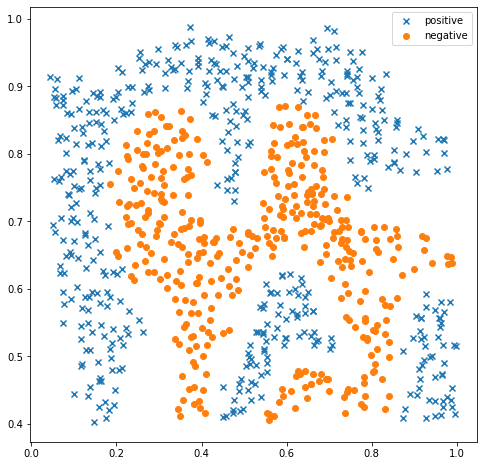

In [7]:
data = loadmat('ex6data2.mat')
X = data['X']
y = data['y']
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.legend()

In [8]:
svm_gauss = svm.SVC(C=1, kernel='rbf', gamma='scale')
svm_gauss.fit(X, y.ravel())

SVC(C=1)

In [9]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 600)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 600)
grid = np.array([[x1, x2] for x1 in X1 for x2 in X2])

In [10]:
dists = svm_gauss.decision_function(grid)
line = np.array([point for point, dist in zip(grid, dists) if abs(dist)<0.05])

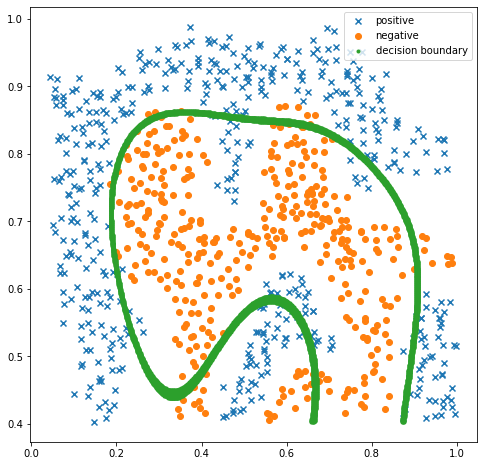

In [11]:
X = data['X']
y = data['y']
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.scatter(line[:,0], line[:,1],marker='.', label='decision boundary')
plt.legend()


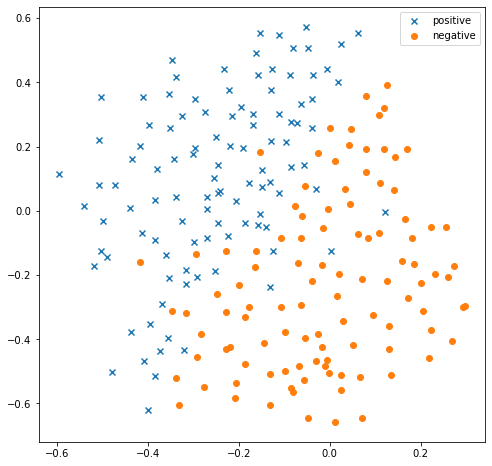

In [12]:
data3 = loadmat('ex6data3.mat')
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.legend()

In [13]:
C_pool = gamma_pool = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

In [14]:
grid_acc = np.zeros((len(C_pool), len(gamma_pool)))

In [15]:

best_acc = 0.0
best_C = 0
best_gamma = 0
best_svm = None
for i, C in enumerate(C_pool):
    for j, gamma in enumerate(gamma_pool):
        svm_3 = svm.SVC(C=C, gamma=gamma, kernel='rbf')
        svm_3.fit(X, y.ravel())
        y_pred = svm_3.predict(Xval)
        accu = np.sum(y_pred == yval.ravel()) / len(Xval)
        print('With C = {}, gamma = {}, Accuracy = {}'.format(C, gamma, accu))
        grid_acc[i][j] = accu
        if accu > best_acc:
            best_C = C
            best_gamma = gamma
            best_svm = svm_3
            best_acc = accu
print(f'Best C, gamma: {best_C} {best_gamma}')
print(f'Best Accuracy: {best_acc}')

With C = 0.01, gamma = 0.01, Accuracy = 0.435
With C = 0.01, gamma = 0.03, Accuracy = 0.435
With C = 0.01, gamma = 0.1, Accuracy = 0.435
With C = 0.01, gamma = 0.3, Accuracy = 0.435
With C = 0.01, gamma = 1, Accuracy = 0.435
With C = 0.01, gamma = 3, Accuracy = 0.435
With C = 0.01, gamma = 10, Accuracy = 0.435
With C = 0.01, gamma = 30, Accuracy = 0.435
With C = 0.03, gamma = 0.01, Accuracy = 0.435
With C = 0.03, gamma = 0.03, Accuracy = 0.435
With C = 0.03, gamma = 0.1, Accuracy = 0.435
With C = 0.03, gamma = 0.3, Accuracy = 0.435
With C = 0.03, gamma = 1, Accuracy = 0.795
With C = 0.03, gamma = 3, Accuracy = 0.83
With C = 0.03, gamma = 10, Accuracy = 0.895
With C = 0.03, gamma = 30, Accuracy = 0.69
With C = 0.1, gamma = 0.01, Accuracy = 0.435
With C = 0.1, gamma = 0.03, Accuracy = 0.435
With C = 0.1, gamma = 0.1, Accuracy = 0.465
With C = 0.1, gamma = 0.3, Accuracy = 0.815
With C = 0.1, gamma = 1, Accuracy = 0.845
With C = 0.1, gamma = 3, Accuracy = 0.895
With C = 0.1, gamma = 10, Ac

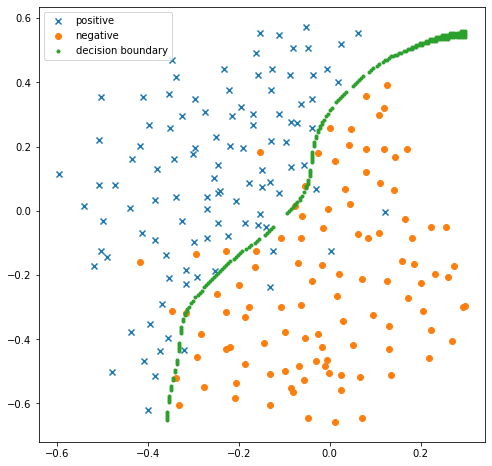

In [16]:
X1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
X2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
grid = np.array([[x1, x2] for x1 in X1 for x2 in X2])
dists = best_svm.decision_function(grid)
line = np.array([point for point, dist in zip(grid, dists) if abs(dist)<0.03])
plt.scatter(*X[np.where(y == 1)[0]].T, marker='x', label='positive')
plt.scatter(*X[np.where(y == 0)[0]].T, label='negative')
plt.scatter(line[:,0], line[:,1],marker='.', label='decision boundary')
plt.legend()

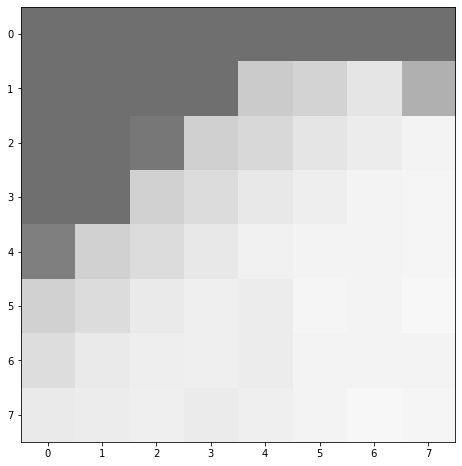

In [179]:
plt.imshow(grid_acc, cmap='gray', vmin=0, vmax=1)